Hi professor - thank you so much for your class. It was a pleasure to be in it. I hope you have an amazing winter break. Happy Holidays!

In [1]:
#Question 1
import pandas as pd

users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [2]:
#Step 1-4
users.groupby('occupation').mean()

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [3]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

#all info for males
malesonly = users[users['gender'] == 'M']
print(malesonly)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
2          3   23      M         writer    32067
3          4   24      M     technician    43537
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
..       ...  ...    ...            ...      ...
935      936   24      M          other    32789
936      937   48      M       educator    98072
939      940   32      M  administrator    02215
940      941   20      M        student    97229
942      943   22      M        student    77841

[670 rows x 5 columns]


In [4]:
#count of males in each occupation
malesonly_count = malesonly.groupby(['occupation'])['gender'].count()
print(malesonly_count)

occupation
administrator     43
artist            15
doctor             7
educator          69
engineer          65
entertainment     16
executive         29
healthcare         5
homemaker          1
lawyer            10
librarian         22
marketing         16
none               5
other             69
programmer        60
retired           13
salesman           9
scientist         28
student          136
technician        26
writer            26
Name: gender, dtype: int64


In [5]:
#total count of people in each occupation
total_gender_count = users.groupby(['occupation'])['gender'].count()
print(total_gender_count)

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: gender, dtype: int64


In [6]:
#ratio result
result = (malesonly_count / total_gender_count) * 100
print(result)

occupation
administrator     54.430380
artist            53.571429
doctor           100.000000
educator          72.631579
engineer          97.014925
entertainment     88.888889
executive         90.625000
healthcare        31.250000
homemaker         14.285714
lawyer            83.333333
librarian         43.137255
marketing         61.538462
none              55.555556
other             65.714286
programmer        90.909091
retired           92.857143
salesman          75.000000
scientist         90.322581
student           69.387755
technician        96.296296
writer            57.777778
Name: gender, dtype: float64


In [7]:
#final answer for step 5
#put malesratio into dataframe
malesratio=result.to_frame(name='males_ratio')
#sort
malesratio.sort_values(['males_ratio'], ascending=[False])

,males_ratio
occupation,
doctor,100.000000
engineer,97.014925
technician,96.296296
retired,92.857143
programmer,90.909091
executive,90.625000
scientist,90.322581
entertainment,88.888889
lawyer,83.333333


In [8]:
#Step 6. For each occupation, calculate the minimum and maximum ages
#group by each occupation for min and max age
minage=users.groupby('occupation')['age'].min()
maxage=users.groupby('occupation')['age'].max()

#add to dataframe
minage=minage.to_frame(name='min_age')
maxage=maxage.to_frame(name='max_age')

#display
display(pd.concat([minage, maxage], 
                  axis = 1))

,min_age,max_age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [9]:
#Step 7. For each combination of occupation and sex, calculate the mean age
occage=users.groupby(['occupation', 'gender'])['age'].mean()
display(occage.to_frame(name='mean_age'))

mean_age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [10]:
#Step 8. For each occupation present the percentage of women and men
#count for each gender
gender_count = users.groupby(['occupation', 'gender'])['gender'].count()
#total count
total_gender_count = users.groupby(['occupation'])['gender'].count()

result = (gender_count / total_gender_count) * 100
display(result.to_frame(name='ratio'))

ratio
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

In [11]:
#question 2
import pandas as pd

#Step 1-3. Assign it to a variable called euro12
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [12]:
#Step 4. Select only the Goal column
display(euro12['Goals'])

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [13]:
#Step 5. How many team participated in the Euro2012?
euro12['Team'].count()

16

In [14]:
#Step 6. What is the number of columns in the dataset?
len(euro12.columns)

35

In [15]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
#to a dataframe called discipline
discipline= euro12.filter(['Team','Yellow Cards','Red Cards'])
discipline=discipline.set_index('Team')
display(discipline)

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0
Germany,4,0
Greece,9,1
Italy,16,0
Netherlands,5,0


In [16]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])

,Yellow Cards,Red Cards
Team,,
Greece,9,1
Poland,7,1
Republic of Ireland,6,1
Italy,16,0
Portugal,12,0
Spain,11,0
Croatia,9,0
Czech Republic,7,0
Sweden,7,0


In [17]:
#Step 9. Calculate the mean Yellow Cards given per Team
display(euro12['Yellow Cards'])

0      9
1      7
2      4
3      5
4      6
5      4
6      9
7     16
8      5
9      7
10    12
11     6
12     6
13    11
14     7
15     5
Name: Yellow Cards, dtype: int64

Note, the above shows the number of yellow cards per team as there is no team that has a repetitive row. This means, the yellow cards they recieved is each teams only value (and thus their mean).

However, if you meant to calculate the overall mean of yellow cards, here is the answer below:

In [18]:
euro12['Yellow Cards'].mean()

7.4375

In [19]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [20]:
#Step 11. Select the teams that start with G
euro12.loc[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [21]:
#Step 12. Select the first 7 columns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [22]:
#Step 13. Select all columns except the last 3
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12['Team'].isin(['England','Italy', 'Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [24]:
#question 3
import pandas as pd
import numpy as np

#step 2 Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000

#create random int series
s1=pd.Series(np.random.randint(1,4,100))
s2=pd.Series(np.random.randint(1,3,100))
s3=pd.Series(np.random.randint(10000, 30000,100))
print(s1)
print(s2)
print(s3)

0     3
1     2
2     2
3     2
4     2
     ..
95    1
96    2
97    3
98    2
99    1
Length: 100, dtype: int32
0     2
1     2
2     2
3     2
4     1
     ..
95    2
96    2
97    2
98    1
99    1
Length: 100, dtype: int32
0     11448
1     24977
2     25709
3     18097
4     29881
      ...  
95    10993
96    17241
97    23298
98    18460
99    24993
Length: 100, dtype: int32


In [25]:
#step 3 Create a DataFrame by joinning the Series by column
#add to dataframe
d1=s1.to_frame(name='series1')
d2=s2.to_frame(name='series2')
d3=s3.to_frame(name='series3')

#combine
finaldata =pd.concat([d1, d2, d3], 
                  axis = 1)
display(finaldata)

,series1,series2,series3
0,3,2,11448
1,2,2,24977
2,2,2,25709
3,2,2,18097
4,2,1,29881
...,...,...,...
95,1,2,10993
96,2,2,17241
97,3,2,23298
98,2,1,18460


In [26]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
finaldata.rename(columns={'series1':'bedrs','series2':'bathrs', 'series3':'price_sqr_meter'}, inplace=True)
display(finaldata)

,bedrs,bathrs,price_sqr_meter
0,3,2,11448
1,2,2,24977
2,2,2,25709
3,2,2,18097
4,2,1,29881
...,...,...,...
95,1,2,10993
96,2,2,17241
97,3,2,23298
98,2,1,18460


In [27]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
#to 'bigcolumn'

bigcol = pd.concat([s1,s2,s3], axis=0)
d1col=bigcol.to_frame(name='bigcolumn')
display(d1col)
print(type(d1col))

,bigcolumn
0,3
1,2
2,2
3,2
4,2
...,...
95,10993
96,17241
97,23298
98,18460


<class 'pandas.core.frame.DataFrame'>


Step 6. Ops it seems it is going only until index 99. Is it true? 
This is true. The indexs repeated 0 to 99 three times (one for each series). 

In [28]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
d1col.reset_index(drop=True, inplace= True)
display(d1col)

,bigcolumn
0,3
1,2
2,2
3,2
4,2
...,...
295,10993
296,17241
297,23298
298,18460


In [29]:
#question 4
#step 1-3
import pandas as pd

#assign to variable
data = pd.read_csv('wind.txt', delim_whitespace=True)
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [30]:
#replace first 3 columns
data.rename(columns={'Yr':'Year','Mo':'Month', 'Dy':'Day'}, inplace=True)
display(data)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [31]:
#step 4 Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

data['Year'] = data['Year'] + 1900
display(data)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [32]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data['date64'] = data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-' + data['Day'].astype(str)
data.set_index(data['date64'], inplace=True)
data.drop('date64', axis=1, inplace=True)
display(data)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date64,,,,,,,,,,,,,,,
1961-1-1,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-1-2,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-1-3,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-1-4,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-1-5,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [33]:
#Step 6. Compute how many values are missing for each location over the entire
# record.They should be ignored in all calculations below.
data.isna().sum().sum()

31

In [34]:
#Step 7. Compute how many non-missing values there are in total.
#count each column
data.count().sum()

98579

In [35]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
# all the times.
windspeeds = data.iloc[:,3:]
display(windspeeds)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date64,,,,,,,,,,,,
1961-1-1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-1-2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-1-3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-1-4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-1-5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [36]:
#calculate the mean for each location
avgofeachloc = windspeeds.mean(axis = 0, skipna = True)
#calculate overall mean
avgofeachloc.mean()

10.227982360836924

In [37]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
# windspeeds and standard deviations of the windspeeds at each location over all the
# days
loc_stats = pd.DataFrame(windspeeds)
loc_stats.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [38]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
# windspeed and standard deviations of the windspeeds across all the locations at each
# day.
day_stats = loc_stats.transpose()
display(day_stats)

date64,1961-1-1,1961-1-2,1961-1-3,1961-1-4,1961-1-5,1961-1-6,1961-1-7,1961-1-8,1961-1-9,1961-1-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
RPT,15.04,14.71,18.50,10.58,13.33,13.21,13.50,10.96,12.58,13.37,...,6.21,16.62,8.67,7.21,13.83,17.58,13.21,14.00,18.50,20.33
VAL,14.96,NaN,16.88,6.63,13.25,8.12,14.29,9.75,10.83,11.12,...,7.38,13.29,5.63,6.58,11.87,16.96,5.46,10.29,14.04,17.41
ROS,13.17,10.83,12.33,11.75,11.42,9.96,9.50,7.62,10.00,19.50,...,13.08,22.21,12.12,7.83,10.34,17.62,13.46,14.42,21.29,27.29
KIL,9.29,6.50,10.13,4.58,6.17,6.67,4.96,5.91,4.75,8.33,...,2.54,9.50,4.79,2.67,2.37,8.08,5.00,8.71,9.13,9.59
SHA,NaN,12.62,11.17,4.54,10.71,5.37,12.29,9.62,10.37,9.71,...,7.58,14.29,5.09,4.79,6.96,13.21,8.12,9.71,12.75,12.08
BIR,9.87,7.67,6.17,2.88,8.21,4.50,8.33,7.29,6.79,6.54,...,5.33,13.08,5.91,4.58,4.29,11.67,9.42,10.54,9.71,10.13
DUB,13.67,11.50,11.25,8.63,11.92,10.67,9.17,14.29,8.04,11.42,...,2.46,16.50,12.25,8.71,1.96,14.46,14.33,19.17,18.08,19.25
CLA,10.25,10.04,NaN,1.79,6.54,4.42,9.29,7.62,10.13,7.79,...,8.38,17.16,9.25,0.75,3.79,15.59,16.25,12.46,12.87,11.63
MUL,10.83,9.79,8.50,5.83,10.92,7.17,7.58,9.25,7.79,8.54,...,5.09,12.71,10.83,5.21,3.04,14.04,15.25,14.50,12.46,11.58
CLO,12.58,9.67,7.67,5.88,10.34,7.50,7.96,10.46,9.08,9.00,...,5.04,12.00,11.71,5.25,3.08,14.00,18.05,16.42,12.12,11.38


In [39]:
day_stats.describe()

date64,1961-1-1,1961-1-2,1961-1-3,1961-1-4,1961-1-5,1961-1-6,1961-1-7,1961-1-8,1961-1-9,1961-1-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
count,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,13.018182,11.336364,11.641818,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,2.808875,3.188994,3.681912,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483
min,9.290000,6.500000,6.170000,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
25%,10.540000,9.730000,9.315000,4.570000,9.807500,6.345000,8.237500,7.620000,7.977500,8.48750,...,5.077500,12.987500,5.840000,4.102500,3.070000,13.802500,9.095000,10.477500,12.375000,11.530000
50%,13.170000,10.830000,11.250000,5.855000,11.170000,7.810000,9.395000,9.685000,10.065000,9.35500,...,6.795000,15.395000,10.040000,5.230000,4.540000,15.025000,13.895000,14.210000,13.455000,12.080000
75%,15.000000,13.225000,12.730000,9.117500,12.170000,10.137500,13.572500,11.792500,11.267500,11.52250,...,8.765000,17.495000,11.970000,7.365000,10.722500,17.302500,16.700000,17.035000,18.185000,19.520000
max,18.500000,17.540000,18.500000,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000


In [40]:
#Step 11. Find the average windspeed in January for each location.
#Treat January 1961 and January 1962 both as January.

#get all jan data
jan = data[data['Month'].isin([1])]
display(jan)

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date64,,,,,,,,,,,,,,,
1961-1-1,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-1-2,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-1-3,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-1-4,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-1-5,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-1-27,1978,1,27,18.54,9.59,15.67,6.42,10.34,7.04,11.63,9.38,9.46,7.58,11.42,24.87
1978-1-28,1978,1,28,35.38,29.88,18.00,15.96,26.92,15.67,15.87,26.34,15.04,17.75,34.42,35.83
1978-1-29,1978,1,29,29.38,18.54,28.08,17.12,17.50,13.75,25.54,15.67,18.08,20.50,19.12,38.20


In [41]:
janwind = jan.iloc[:,3:]
#jan mean
janwind.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [42]:
#Step 12. Downsample the record to a yearly frequency for each location

#calculating the count of each location for each year - this how I interpreted this question regarding frequency
yearfreq = data.groupby(['Year']).count()
yearfreq = yearfreq.iloc[:,2:]
display(yearfreq)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Year,,,,,,,,,,,,
1961,360,362,363,361,363,365,362,363,362,364,365,362
1962,364,365,365,364,365,365,365,365,365,365,365,364
1963,365,365,365,365,365,365,365,365,365,365,365,365
1964,366,366,366,366,366,366,366,366,366,366,366,366
1965,365,365,365,365,365,365,365,365,365,365,365,365
1966,365,365,365,365,365,365,365,365,365,365,365,365
1967,365,365,365,365,365,365,365,365,365,365,365,365
1968,366,366,366,366,366,366,366,366,366,366,366,366
1969,365,365,365,365,365,365,365,365,365,365,365,365


In [43]:
#Step 13. Downsample the record to a monthly frequency for each location

#calculating the count of each location for each month - this how I interpreted this question regarding frequency
monthfreq = data.groupby(['Month']).count()
monthfreq = monthfreq.iloc[:,2:]
display(monthfreq)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Month,,,,,,,,,,,,
1,557,557,558,558,556,558,558,557,558,558,558,558
2,508,508,507,506,508,508,508,508,508,508,508,508
3,556,558,558,557,558,558,558,558,556,558,558,556
4,540,540,540,540,540,540,540,540,540,540,540,540
5,558,557,558,557,558,558,557,558,558,558,558,558
6,539,540,540,540,540,540,540,540,540,540,540,539
7,558,558,558,558,558,558,557,558,558,558,558,558
8,557,558,558,558,558,558,558,558,558,557,558,557
9,540,539,539,539,540,540,540,539,540,540,540,540


In [44]:
#Step 14. Downsample the record to a weekly frequency for each location.

#attempt for each week but did not succeed
weekfreq = pd.DataFrame(data)
weekfreq['date64'] = data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-' + data['Day'].astype(str)
weekfreq['date64'] = pd.to_datetime(weekfreq['date64'])
weekfreq = weekfreq.groupby(pd.Grouper(freq = 'W', key = 'date64')).count()

In [45]:
#question 5
#step 1 -3

chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [46]:
#Step 4. See the first 10 entries
chipo.iloc[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [47]:
#Step 5. What is the number of observations in the dataset?
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

The above shows the number of oberservations per category in the dataset (unfortunately - I was a little confused on the wording for exactly what you were looking for. Hopefully, this was it).

In [48]:
#Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [49]:
#Step 7. Print the name of all the columns.
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [50]:
#Step 7 but nicer format
chipo.iloc[:0]

,order_id,quantity,item_name,choice_description,item_price


Step 8. How is the dataset indexed?
Answer - by row

In [51]:
#Step 9. Which was the most-ordered item?
items = chipo.groupby(['item_name']).sum()
items.sort_values(['quantity'], ascending=[False])

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351
Chips,208004,230
Steak Bowl,193752,221
Bottled Water,175944,211
Chips and Fresh Tomato Salsa,100419,130


Thus, The most ordered item is a chicken bowl

Step 10. For the most-ordered item, how many items were ordered?
761 of the chicken bowl was ordered

In [52]:
#Step 11. What was the most ordered item in the choice_description column?
descriptions = chipo.groupby(['choice_description']).sum()
descriptions.sort_values(['quantity'], ascending=[False])

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42
...,...,...
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Pinto Beans, Guacamole, Lettuce]]",577,1
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]",585,1
"[Roasted Chili Corn Salsa, [Fajita Vegetables, Sour Cream, Lettuce, Guacamole]]",235,1


The most ordered item in the choice description column is a diet coke

In [53]:
#Step 12. How many items were orderd in total?
chipo['quantity'].sum()

4972

In [54]:
#Step 13.
#see what type it is currently
chipo.dtypes['item_price']

dtype('O')

In [55]:
#• Turn the item price into a float
chipo['item_price'] = chipo['item_price'].str[1:]

In [56]:
#see no $
display(chipo['item_price'])

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [57]:
#change the type
chipo['item_price'] = chipo['item_price'].astype(float)

In [58]:
#• Check the item price type
chipo.dtypes['item_price']

dtype('float64')

In [59]:
#• Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: str(x))

In [60]:
#• Check the item price type
chipo.dtypes['item_price']

dtype('O')

In [61]:
#change back to float
chipo['item_price'] = chipo['item_price'].astype(float)

In [62]:
chipo.dtypes['item_price']

dtype('float64')

In [63]:
#Step 14. How much was the revenue for the period in the dataset?
chipo['item_price'].sum()

34500.16

In [64]:
#Step 15. How many orders were made in the period?
chipo.sort_values(['order_id'], ascending=[False])

,order_id,quantity,item_name,choice_description,item_price
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
...,...,...,...,...,...
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
2,1,1,Nantucket Nectar,[Apple],3.39
1,1,1,Izze,[Clementine],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39


In [65]:
chipo.groupby(['order_id']).count().count()

quantity              1834
item_name             1834
choice_description    1834
item_price            1834
dtype: int64

Both cells above show the max order is 1834

In [66]:
#Step 16. What is the average revenue amount per order?
chipo.groupby(['order_id'])['item_price'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [67]:
#Step 17. How many different items are sold?
chipo.groupby(['item_name'])['item_name'].count().count()

50

In [68]:
#question 6
import pandas as pd

#import data
md_df = pd.read_csv(r'us-marriages-divorces-1867-2014.csv')
md_df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [69]:
#determine max and min year
md_df.sort_values(['Year'], ascending=[False])

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
144,2011,2118000.0,877000.0,312034000,6.8,2.8
143,2010,2096000.0,872000.0,309776000,6.8,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
141,2008,2157000.0,844000.0,304543000,7.1,2.8
140,2007,2197000.0,856000.0,301696000,7.3,2.8
...,...,...,...,...,...,...
4,1871,359000.0,12000.0,41010000,8.8,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3


Above shows that the entire dataset satisifies the years required

In [70]:
#Create a line plot showing the number of marriages and divorces per capita in the
#U.S. between 1867 and 2014. Label both lines and show the legend.
#Don't forget to label your axes

# import graph objects as "go"
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


# prepare data frame for specific years is not needed as most recent year in dataset is 2011
#prepare data

#marriage per capita
mar_cap = (md_df['Marriages'])/(md_df['Population'])
#divorce per capita
div_cap = (md_df['Divorces'])/(md_df['Population'])

#add marriage and divorce capitas to dataframe
md_df['marriage_capita'] = mar_cap
md_df['divorce_capita'] = div_cap
display(md_df)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriage_capita,divorce_capita
0,1867,357000.0,10000.0,36970000,9.7,0.3,0.009656,0.000270
1,1868,345000.0,10000.0,37885000,9.1,0.3,0.009107,0.000264
2,1869,348000.0,11000.0,38870000,9.0,0.3,0.008953,0.000283
3,1870,352000.0,11000.0,39905000,8.8,0.3,0.008821,0.000276
4,1871,359000.0,12000.0,41010000,8.8,0.3,0.008754,0.000293
...,...,...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8,0.007282,0.002837
141,2008,2157000.0,844000.0,304543000,7.1,2.8,0.007083,0.002771
142,2009,2080000.0,840000.0,307240000,6.8,2.7,0.006770,0.002734
143,2010,2096000.0,872000.0,309776000,6.8,2.8,0.006766,0.002815


In [71]:
#create graph

# Creating trace1 for marriages
trace1 = go.Scatter(
                    x = md_df.Year,
                    y = md_df.marriage_capita,
                    mode = "lines",
                    name = "marriages",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
                   
# Creating trace2 for divorces
trace2 = go.Scatter(
                    x = md_df.Year,
                    y = md_df.divorce_capita,
                    mode = "lines+markers",
                    name = "divorces",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))
                    
data = [trace1, trace2]
layout = dict(title = 'Marriages and divorces per capita in the U.S. between 1867 and 2011',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
             yaxis =dict(title='Count'))
fig = dict(data = data, layout = layout)
iplot(fig)

In [72]:
#Question 7
#Create a vertical bar chart comparing the number of marriages and divorces per
# capita in the U.S. between 1900, 1950, and 2000.
# Don't forget to label your axes!

# prepare data frames
specificmd = md_df[md_df['Year'].isin([1900,1950,2000])]
#marriage per capita
mar_cap = (specificmd['Marriages'])/(specificmd['Population'])
#divorce per capita
div_cap = (specificmd['Divorces'])/(specificmd['Population'])

#add marriage and divorce capitas to dataframe
specificmd['marriage_capita'] = mar_cap
specificmd['divorce_capita'] = div_cap
display(specificmd)

C:\Users\Cassandra\AppData\Local\Temp\ipykernel_17988\2384607035.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Cassandra\AppData\Local\Temp\ipykernel_17988\2384607035.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000,marriage_capita,divorce_capita
33,1900,709000.0,56000.0,76094000,9.3,0.7,0.009317,0.000736
83,1950,1667000.0,385000.0,151684000,11.0,2.5,0.010990,0.002538
133,2000,2315000.0,944000.0,282398000,8.2,3.3,0.008198,0.003343


In [73]:
#creath graph

# create trace1 
trace1 = go.Bar(
                x = specificmd.Year,
                y = specificmd.marriage_capita,
                name = "Marriage_capita",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
                #text = specificmd.country)
# create trace2 
trace2 = go.Bar(
                x = specificmd.Year,
                y = specificmd.divorce_capita,
                name = "Divorce_capita",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
                #text = specificmd.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group", title = 'Marriages and divorces per capita in the U.S. between 1900, 1950, and 2000',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
             yaxis =dict(title='Count'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [74]:
#Question 8
import pandas as pd

#import data
actor = pd.read_csv(r'actor_kill_counts.csv')
actor.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


In [75]:
#Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
# the actors by their kill count and label each bar with the corresponding actor's name.
# Don't forget to label your axes!

#prepare data
sorted_act = actor.sort_values(['Count'], ascending=[False])
display(sorted_act)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


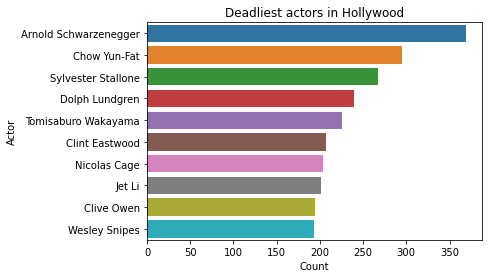

In [76]:
#create graph
import seaborn as sns
test = sns.barplot(y = 'Actor', x = 'Count', data=sorted_act,  orient = 'h').set_title('Deadliest actors in Hollywood')

In [77]:
#Question 9
#Create a pie chart showing the fraction of all Roman Emperors that were
# assassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows the
# percentage breakdown of the categories.

import pandas as pd

#import data
roman = pd.read_csv(r'roman-emperor-reigns.csv')
roman.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [83]:
#counts of each cause of death
assassinatedcount = roman.loc[roman['Cause_of_Death'].isin(['Assassinated'])].count()
possassassinatedcount = roman.loc[roman['Cause_of_Death'].isin(['Possibly assassinated'])].count()
suicidecount = roman.loc[roman['Cause_of_Death'].isin(['Suicide'])].count()
diedincaptivity = roman.loc[roman['Cause_of_Death'].isin(['Died in captivity'])].count()
executed = roman.loc[roman['Cause_of_Death'].isin(['Executed'])].count()
illness = roman.loc[roman['Cause_of_Death'].isin(['Illness'])].count()
killedinbattle = roman.loc[roman['Cause_of_Death'].isin(['Killed in battle'])].count()
naturalcauses = roman.loc[roman['Cause_of_Death'].isin(['Natural causes'])].count()

#combine all values into a list
romandata = []
romandata.append(assassinatedcount[0])
romandata.append(possassassinatedcount[0])
romandata.append(suicidecount[0])
romandata.append(diedincaptivity[0])
romandata.append(executed[0])
romandata.append(illness[0])
romandata.append(killedinbattle[0])
romandata.append(naturalcauses[0])

#create labels for graph
labels = ['Assassinated','Possibly assassinated', 'Suicide', 'Died in captivity', 'Executed', 'Illness', 'Killed in battle', 'Natural causes']

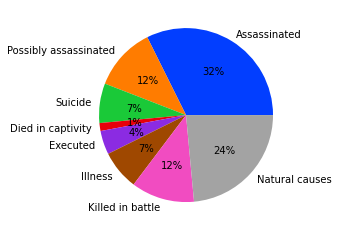

In [92]:
#creath graph

import matplotlib.pyplot as plt
import seaborn as sns

#colour
color = sns.color_palette('bright')

#title
plt.title('Percentages of Roman Emperors deaths')

#make graph
plt.pie(romandata, labels=labels, colors = color, autopct='%.0f%%')

#shows graph
plt.show()

The blue portion is what answers the question on the percentage that is focused on assassination. 

In [78]:
#Question 10
# Create a scatter plot showing the relationship between the total revenue earned by
# arcades and the number of Computer Science PhDs awarded in the U.S. between
# 2000 and 2009.
# Don't forget to label your axes!
# Color each dot according to its year.

import pandas as pd

#import data
arcade = pd.read_csv(r'arcade-revenue-vs-cs-doctorates.csv')
arcade.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [79]:
arcade.sort_values(['Year'], ascending=[False])

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
9,2009,1.734,1611
8,2008,1.803,1787
7,2007,1.654,1656
6,2006,1.601,1453
5,2005,1.435,1129
4,2004,1.307,948
3,2003,1.240,867
2,2002,1.269,809
1,2001,1.176,830
0,2000,1.196,861


Above shows no specific rows are needed as max year is 2009 and min year is 2000

In [80]:
#renaming columns to remove spaces
arcade.rename(columns = {'Total Arcade Revenue (billions)':'Tot_Arcade_Revenue','Computer Science Doctorates Awarded (US)':'Comp_Science_Doctorates_Awarded'}, inplace=True)
display(arcade)

,Year,Tot_Arcade_Revenue,Comp_Science_Doctorates_Awarded
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [81]:
#create graph

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
#creating each years dataframe
df2000 = arcade[arcade.Year == 2000].iloc[:1,:]
df2001 = arcade[arcade.Year == 2001].iloc[:1,:]
df2002 = arcade[arcade.Year == 2002].iloc[:1,:]
df2003 = arcade[arcade.Year == 2003].iloc[:1,:]
df2004 = arcade[arcade.Year == 2004].iloc[:1,:]
df2005 = arcade[arcade.Year == 2005].iloc[:1,:]
df2006 = arcade[arcade.Year == 2006].iloc[:1,:]
df2007 = arcade[arcade.Year == 2007].iloc[:1,:]
df2008 = arcade[arcade.Year == 2008].iloc[:1,:]
df2009 = arcade[arcade.Year == 2009].iloc[:1,:]

# creating trace1
trace1 =go.Scatter(x = df2000.Comp_Science_Doctorates_Awarded,y = df2000.Tot_Arcade_Revenue,mode = "markers",name = "2000",marker = dict(color = 'rgba(255, 128, 255, 0.8)'),text= df2000.Year)
# creating trace2
trace2 =go.Scatter(x = df2001.Comp_Science_Doctorates_Awarded,y = df2001.Tot_Arcade_Revenue,mode = "markers", name = "2001",marker = dict(color = 'rgba(255, 128, 2, 0.8)'),text= df2001.Year)
# creating trace3
trace3 =go.Scatter(x = df2002.Comp_Science_Doctorates_Awarded, y = df2002.Tot_Arcade_Revenue, mode = "markers", name = "2002", marker = dict(color = 'rgba(0, 255, 200, 0.8)'),text= df2002.Year)
# creating trace4
trace4 =go.Scatter(x = df2003.Comp_Science_Doctorates_Awarded,y = df2003.Tot_Arcade_Revenue,mode = "markers",name = "2003",marker = dict(color = 'rgba(25, 128, 25, 0.8)'),text= df2003.Year)
# creating trace5
trace5 =go.Scatter(x = df2004.Comp_Science_Doctorates_Awarded,y = df2004.Tot_Arcade_Revenue,mode = "markers", name = "2004",marker = dict(color = 'rgba(55, 18, 2, 0.8)'),text= df2004.Year)
# creating trace6
trace6 =go.Scatter(x = df2005.Comp_Science_Doctorates_Awarded, y = df2005.Tot_Arcade_Revenue, mode = "markers", name = "2005", marker = dict(color = 'rgba(0, 0, 0, 0.8)'),text= df2005.Year)
# creating trace7
trace7 =go.Scatter(x = df2006.Comp_Science_Doctorates_Awarded,y = df2006.Tot_Arcade_Revenue,mode = "markers",name = "2006",marker = dict(color = 'rgba(178, 34, 34, 0.8)'),text= df2006.Year)
# creating trace8
trace8 =go.Scatter(x = df2007.Comp_Science_Doctorates_Awarded,y = df2007.Tot_Arcade_Revenue,mode = "markers", name = "2007",marker = dict(color = 'rgba(255, 255, 0, 0.8)'),text= df2007.Year)
# creating trace9
trace9 =go.Scatter(x = df2008.Comp_Science_Doctorates_Awarded, y = df2008.Tot_Arcade_Revenue, mode = "markers", name = "2008", marker = dict(color = 'rgba(0, 0, 205, 0.8)'),text= df2008.Year)
# creating trace10
trace10 =go.Scatter(x = df2009.Comp_Science_Doctorates_Awarded,y = df2009.Tot_Arcade_Revenue,mode = "markers",name = "2009",marker = dict(color = 'rgba(105, 105, 105, 0.8)'),text= df2009.Year)

#making the graph
data = [trace1, trace2, trace3, trace4, trace5, trace6,trace7,trace8,trace9,trace10]
layout = dict(title = 'Relationship between arcade revenues and the # Computer Science PhDs awarded(US) between 2000-2009', xaxis= dict(title='Computer Science Doctorates Awarded(US)',ticklen= 5,zeroline= False),yaxis= dict(title='Total Arcade Revenue(billions)',ticklen= 5,zeroline= False))
fig = dict(data = data, layout = layout)
iplot(fig)